In [25]:
from __future__ import print_function
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# import keras
from os.path import isfile, isdir, join, split, splitext, exists
from os import listdir, makedirs

In [2]:
def calculate_SAD(arr1, arr2):
    """Calculate sum of absolute distance"""
    z = abs(arr1/100 - arr2/100)
    z = z * 100
    return np.sum(z)

def calculate_SSD(arr1, arr2):
    """Calculate sum of squared distance"""
    z = abs(arr1/100 - arr2/100)
    z = z * 100
    return np.sum(z**2)

In [3]:
# Require the following library:
# import matplotlib.pyplot as plt

# Receive np.array, show the image
def show_image(arr, title=""):
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.imshow(np.asarray(arr))
    plt.title(title)

# Question 1
Read all images and convert to grayscale images

In [4]:
path = "CroppedYale/"

In [5]:
directories = [join(path, d)
               for d in listdir(path) 
               if isdir(join(path, d))]

image_files = [join(d, f)
                for d in directories
                for f in listdir(d)
                if isfile(join(d, f))]


print("{:^3} - {}".format("#", "Filename"))
["{:03} - {}".format(n+1, f) for n, f in enumerate(image_files)]

 #  - Filename


['001 - CroppedYale/yaleB33/yaleB33_P00A-050E-40.pgm',
 '002 - CroppedYale/yaleB33/yaleB33_P00A+000E+90.pgm',
 '003 - CroppedYale/yaleB33/yaleB33_P00A+085E-20.pgm',
 '004 - CroppedYale/yaleB33/yaleB33_P00A-070E+00.pgm',
 '005 - CroppedYale/yaleB33/yaleB33_P00A+035E-20.pgm',
 '006 - CroppedYale/yaleB33/yaleB33_P00A+020E-10.pgm',
 '007 - CroppedYale/yaleB33/yaleB33_P00A+000E+45.pgm',
 '008 - CroppedYale/yaleB33/yaleB33_P00A+060E+20.pgm',
 '009 - CroppedYale/yaleB33/yaleB33_P00A+110E-20.pgm',
 '010 - CroppedYale/yaleB33/yaleB33_P00A-110E+15.pgm',
 '011 - CroppedYale/yaleB33/yaleB33_P00A+085E+20.pgm',
 '012 - CroppedYale/yaleB33/yaleB33_P00A-025E+00.pgm',
 '013 - CroppedYale/yaleB33/yaleB33_P00A-035E+15.pgm',
 '014 - CroppedYale/yaleB33/yaleB33_P00A-095E+00.pgm',
 '015 - CroppedYale/yaleB33/yaleB33_P00A+070E-35.pgm',
 '016 - CroppedYale/yaleB33/yaleB33_P00A+060E-20.pgm',
 '017 - CroppedYale/yaleB33/yaleB33_P00A+020E+10.pgm',
 '018 - CroppedYale/yaleB33/yaleB33_P00A-035E+65.pgm',
 '019 - Cr

In [6]:
len(image_files)

2433

In [7]:
grayscale_path = "CroppedYale_Grayscale/"
for d in directories:
    _d = d.split('/')
    _dir = join(grayscale_path, _d[1])
    if not exists(_dir):
        print("{} Not exist".format(_dir))
        print("Creating directory {}".format(_dir))
        makedirs(_dir)
        print("Directory {} created\n".format(_dir))
    else:
        print("{} Exist".format(_dir))

CroppedYale_Grayscale/yaleB33 Exist
CroppedYale_Grayscale/yaleB34 Exist
CroppedYale_Grayscale/yaleB02 Exist
CroppedYale_Grayscale/yaleB05 Exist
CroppedYale_Grayscale/yaleB04 Exist
CroppedYale_Grayscale/yaleB03 Exist
CroppedYale_Grayscale/yaleB35 Exist
CroppedYale_Grayscale/yaleB32 Exist
CroppedYale_Grayscale/yaleB10 Exist
CroppedYale_Grayscale/yaleB17 Exist
CroppedYale_Grayscale/yaleB28 Exist
CroppedYale_Grayscale/yaleB21 Exist
CroppedYale_Grayscale/yaleB26 Exist
CroppedYale_Grayscale/yaleB19 Exist
CroppedYale_Grayscale/yaleB27 Exist
CroppedYale_Grayscale/yaleB18 Exist
CroppedYale_Grayscale/yaleB20 Exist
CroppedYale_Grayscale/yaleB16 Exist
CroppedYale_Grayscale/yaleB29 Exist
CroppedYale_Grayscale/yaleB11 Exist
CroppedYale_Grayscale/yaleB08 Exist
CroppedYale_Grayscale/yaleB37 Exist
CroppedYale_Grayscale/yaleB30 Exist
CroppedYale_Grayscale/yaleB39 Exist
CroppedYale_Grayscale/yaleB06 Exist
CroppedYale_Grayscale/yaleB01 Exist
CroppedYale_Grayscale/yaleB38 Exist
CroppedYale_Grayscale/yaleB0

In [14]:
import time

start = time.time()
converted = 0
file_existed = 0

for i in image_files:
    ext = splitext(i)
    if ext[-1] != ".pgm":
        print("Excluding image {}".format(i))
        continue

    img_name = i.split('/')
    gray_img_name = join(grayscale_path, img_name[1], img_name[2])
    if exists(gray_img_name):
        file_existed = file_existed + 1
        continue
    
    img = Image.open(i)
    img = img.convert("L")
    img.save(gray_img_name)
    converted = converted + 1
print("{} of grayscale images already existed.".format(file_existed))
print("Finished converting {} images to grayscale image in {:.3f}s".format(converted, time.time() - start))

Excluding image CroppedYale/yaleB17/yaleB17_P00A-010E+00.pgm.bad
Excluding image CroppedYale/yaleB18/yaleB18_P00A-010E+00.pgm.bad
Excluding image CroppedYale/yaleB16/yaleB16_P00A+095E+00.pgm.bad
Excluding image CroppedYale/yaleB16/yaleB16_P00A-010E+00.pgm.bad
Excluding image CroppedYale/yaleB11/yaleB11_P00A-050E-40.pgm.bad
Excluding image CroppedYale/yaleB11/yaleB11_P00A+050E-40.pgm.bad
Excluding image CroppedYale/yaleB11/yaleB11_P00A-110E+15.pgm.bad
Excluding image CroppedYale/yaleB11/yaleB11_P00A+095E+00.pgm.bad
Excluding image CroppedYale/yaleB13/yaleB13_P00A+095E+00.pgm.bad
Excluding image CroppedYale/yaleB13/yaleB13_P00A-110E+15.pgm.bad
Excluding image CroppedYale/yaleB13/yaleB13_P00A+050E-40.pgm.bad
Excluding image CroppedYale/yaleB13/yaleB13_P00A-050E-40.pgm.bad
Excluding image CroppedYale/yaleB12/yaleB12_P00A+095E+00.pgm.bad
Excluding image CroppedYale/yaleB12/yaleB12_P00A-110E+15.pgm.bad
Excluding image CroppedYale/yaleB12/yaleB12_P00A+050E-40.pgm.bad
Excluding image CroppedYa

# Question 2
Split the images into training set / test set
- First 35 images as training, the rest 30 images as testing

In [15]:
train_image = image_files[:35]
test_image  = image_files[-35:]

In [32]:
for n, tri in enumerate(train_image):
    if n==0:
        continue
    im1 = np.array(Image.open(train_image[n-1]))
    im2 = np.array(Image.open(tri))
    sad = calculate_SAD(im2, im1)
    ssd = calculate_SSD(im2, im1)
    print("Comparing:\n\t{}\n\t{}".format(train_image[n], train_image[n-1]))
    print("\tSAD: {:>8}\n\tSSD: {:>8}\n".format(sad, ssd))
    

Comparing:
	CroppedYale/yaleB33/yaleB33_P00A+000E+90.pgm
	CroppedYale/yaleB33/yaleB33_P00A-050E-40.pgm
	SAD:   924820
	SSD:    96720

Comparing:
	CroppedYale/yaleB33/yaleB33_P00A+085E-20.pgm
	CroppedYale/yaleB33/yaleB33_P00A+000E+90.pgm
	SAD:   618360
	SSD:    99776

Comparing:
	CroppedYale/yaleB33/yaleB33_P00A-070E+00.pgm
	CroppedYale/yaleB33/yaleB33_P00A+085E-20.pgm
	SAD:  1801052
	SSD:   244496

Comparing:
	CroppedYale/yaleB33/yaleB33_P00A+035E-20.pgm
	CroppedYale/yaleB33/yaleB33_P00A-070E+00.pgm
	SAD:  2520364
	SSD:   321040

Comparing:
	CroppedYale/yaleB33/yaleB33_P00A+020E-10.pgm
	CroppedYale/yaleB33/yaleB33_P00A+035E-20.pgm
	SAD:   438584
	SSD:    59072

Comparing:
	CroppedYale/yaleB33/yaleB33_P00A+000E+45.pgm
	CroppedYale/yaleB33/yaleB33_P00A+020E-10.pgm
	SAD:  1627016
	SSD:   203680

Comparing:
	CroppedYale/yaleB33/yaleB33_P00A+060E+20.pgm
	CroppedYale/yaleB33/yaleB33_P00A+000E+45.pgm
	SAD:  1528000
	SSD:   197504

Comparing:
	CroppedYale/yaleB33/yaleB33_P00A+110E-20.pgm
	Crop

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

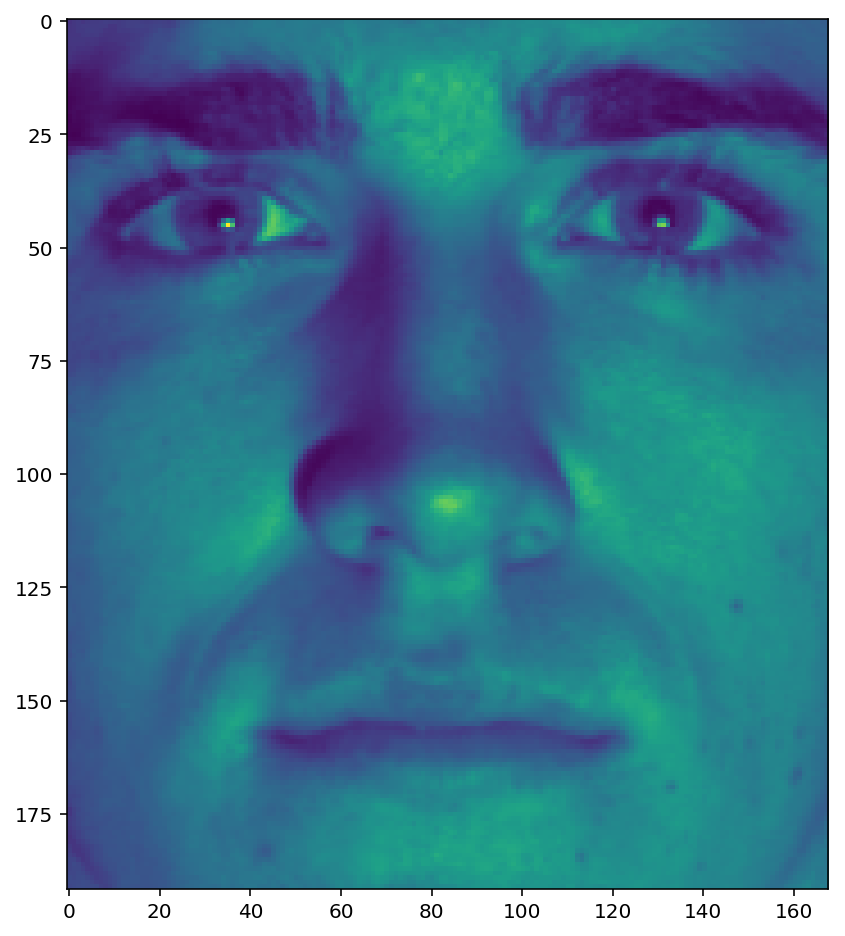

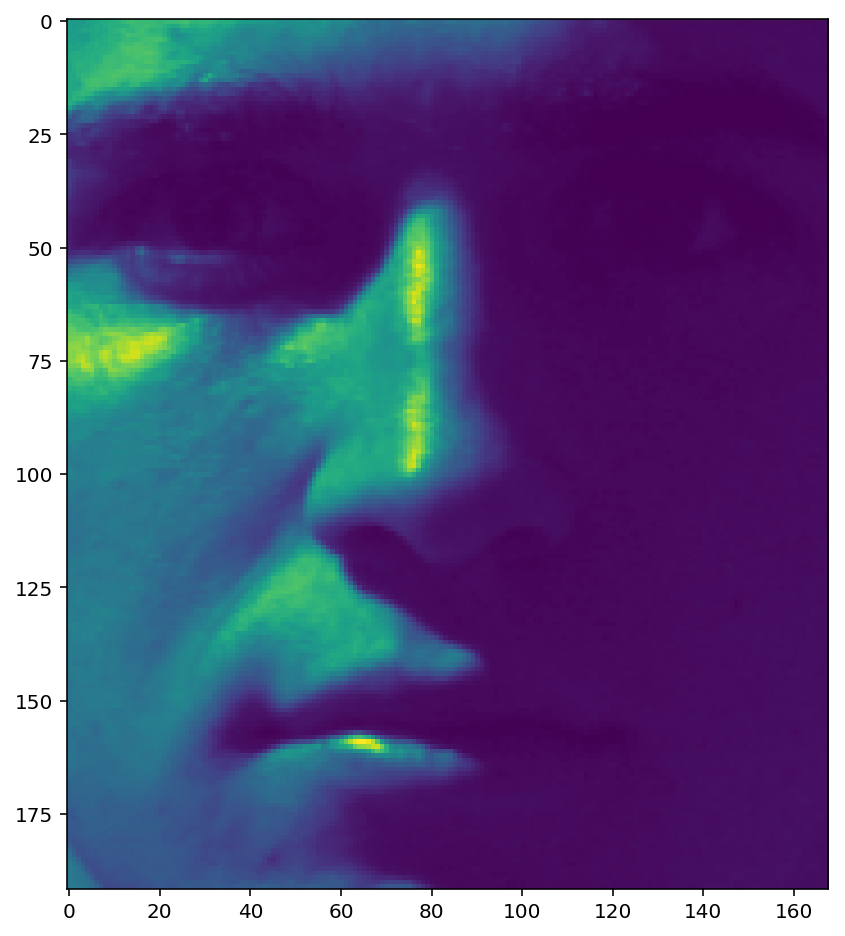

In [68]:
nbrs = NearestNeighbors()
show_image(im2)
show_image(im1)
nbrs.fit(im2)
distances, indices = nbrs.kneighbors(im1)